<a href="https://colab.research.google.com/github/sseyler0119/Data-Science-Projects/blob/master/richestCountries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/sseyler0119/datasets/master/countries.csv')
data.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


### What's the richest country in the world on a per-person basis?

In [6]:
mean_gdp_per_capita = data.groupby(['country']).mean().gdpPerCapita

In [10]:
mean_gdp_per_capita.sort_values(ascending=False).head()

country
Kuwait           65332.910472
Switzerland      27074.334405
Norway           26747.306554
United States    26261.151347
Canada           22410.746340
Name: gdpPerCapita, dtype: float64

In [11]:
top5 = mean_gdp_per_capita.sort_values(ascending=False).head()

#### Is Kuwait really the richest country in the world (on a per-person basis)?

In [12]:
kuwait = data[data.country == 'Kuwait']

In [13]:
kuwait.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
852,Kuwait,Asia,1952,55.565,160000,108382.35290
853,Kuwait,Asia,1957,58.033,212846,113523.13290
854,Kuwait,Asia,1962,60.470,358266,95458.11176
855,Kuwait,Asia,1967,64.624,575003,80894.88326
856,Kuwait,Asia,1972,67.712,841934,109347.86700


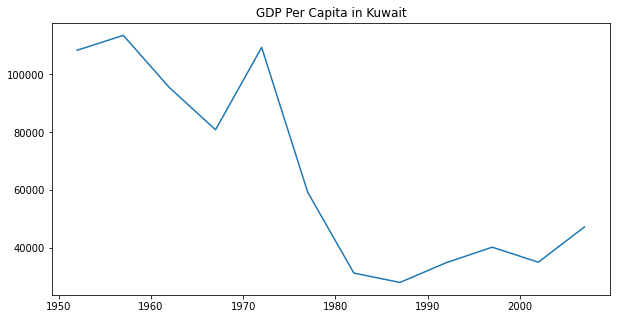

In [14]:
plt.figure(figsize=(10,5))
plt.plot(kuwait.year, kuwait.gdpPerCapita)
plt.title('GDP Per Capita in Kuwait')
plt.show() # this shows a steep drop off in GDP Per Capita starting in 1970

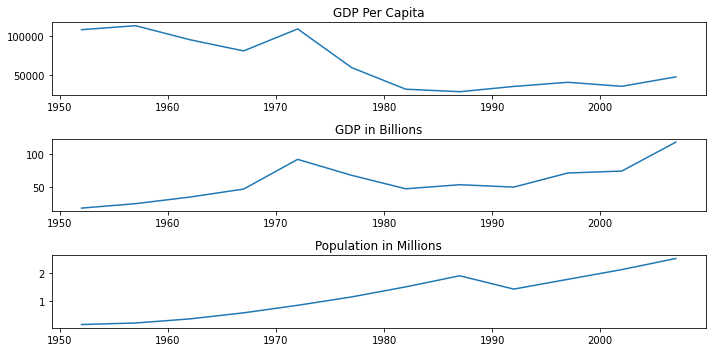

In [16]:
plt.figure(figsize=(10,5))
plt.subplot(311)
plt.title('GDP Per Capita')
plt.plot(kuwait.year, kuwait.gdpPerCapita)

plt.subplot(312)
plt.title('GDP in Billions')
plt.plot(kuwait.year, kuwait.gdpPerCapita * kuwait.population / 10**9)

plt.subplot(313)
plt.title('Population in Millions')
plt.plot(kuwait.year, kuwait.population / 10**6)

plt.tight_layout() # keeps titles from overlapping with graphs
plt.show()

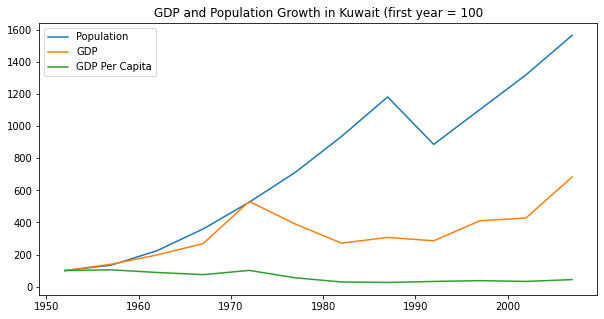

In [19]:
plt.figure(figsize=(10,5))
plt.plot(kuwait.year, kuwait.population / kuwait.population.iloc[0] * 100) # sets first year to 100 for comparison
kuwait_gdp = kuwait.gdpPerCapita * kuwait.population
plt.plot(kuwait.year, kuwait_gdp / kuwait_gdp.iloc[0] * 100)
plt.plot(kuwait.year, kuwait.gdpPerCapita / kuwait.gdpPerCapita.iloc[0] * 100)
plt.title('GDP and Population Growth in Kuwait (first year = 100')
plt.legend(['Population', 'GDP', 'GDP Per Capita'])
plt.show() # up until 1970, population and GDP grew at about the same rate, but after that the population kept growing while the GDP went down

In [20]:
top5

country
Kuwait           65332.910472
Switzerland      27074.334405
Norway           26747.306554
United States    26261.151347
Canada           22410.746340
Name: gdpPerCapita, dtype: float64

In [21]:
us = data[data.country == 'United States']

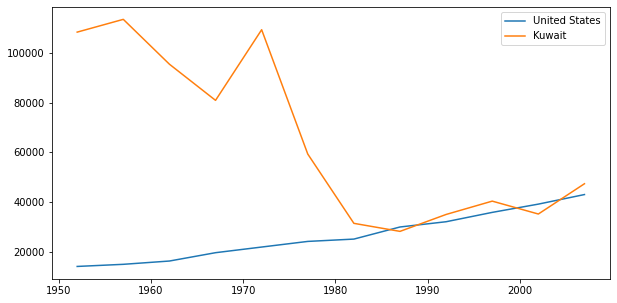

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(us.year, us.gdpPerCapita)
plt.plot(kuwait.year, kuwait.gdpPerCapita)
plt.legend(['United States', 'Kuwait'])
plt.show()